In [3]:
import numpy as np
import mne
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# 8 channels from 10-20 montage system.
channels = [
    # frontal
    'Fz',
    # central and temporal
    'C3',
    'Cz',
    'C4',
    # parietal
    'Po7',
    'Pz',
    'Po8',
    # occipital
    'Oz',
]

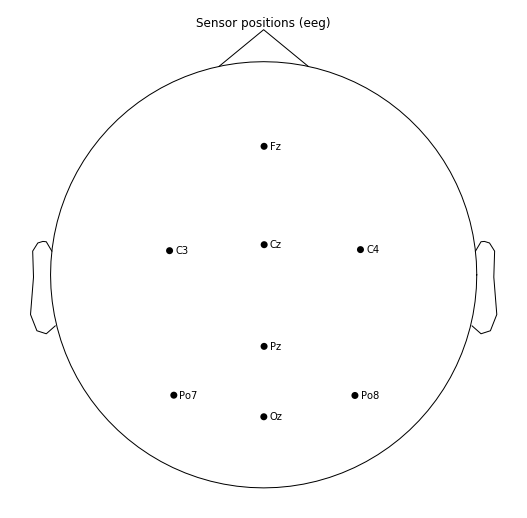

<Figure size 432x288 with 0 Axes>

In [46]:
# plot EEG montage

def rename_ch(ch_old):
    if ch_old[-2] == '.':
        return ch_old[:-2]
    else:
        return ch_old[:-1]

sample = mne.io.read_raw_edf('S003R03.edf', verbose=False, preload=True)
sample.rename_channels(rename_ch)
sample = sample.pick_channels(channels)
ch_map = {ch.lower(): ch for ch in sample.ch_names}
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
ten_twenty_montage.ch_names = [ch_map[ch.lower()] if ch.lower() in ch_map else ch 
                               for ch in ten_twenty_montage.ch_names]
sample.set_montage(ten_twenty_montage)

# plotting
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
sample.plot_sensors(show_names=True, axes=ax)
plt.savefig('sensor_positions.pdf')
plt.show()

### Using a prerecorded picture

We saved a picture of sensor positions given by `mne` and enhanced its appearance (now, sensors names are larger but positions are the same).

We've also presaved the screen-space positions of sensors, so that we don't have to deal with 3D-to-2D projection used by `mne`.

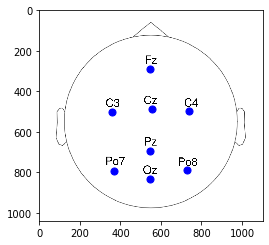

In [72]:
sensor_pos_pic = plt.imread('images/sensor_positions.png')
plt.figure(figsize=(4, 4))
plt.imshow(sensor_pos_pic)

loc_2d = {
    'Fz': (104, 141),
    'C3': (68, 101),
    'Cz': (105, 104),
    'C4': (140, 102),
    'Pz': (104, 65),
    'Po7': (70, 46),
    'Oz': (104, 39),
    'Po8': (138, 47),
}

orig_h, orig_w = 209., 196.
png_h, png_w = 1102., 1040.

for k, v in loc_2d.items():
    loc_2d[k] = v[0] / orig_h * png_h, (1 - v[1] / orig_w) * png_w
    plt.scatter(*loc_2d[k], c='b', s=50)

In [84]:
def vis_pairs(inds_from, inds_to, sensor_pos_pic_path='images/sensor_positions.png', figside=4):
    channels_from = np.array(channels)[inds_from]
    channels_to = np.array(channels)[inds_to]
    
    sensor_pos_pic = plt.imread(sensor_pos_pic_path)
    pic_h, pic_w = sensor_pos_pic.shape[:2]
    sensor_pos_pic_comb = np.concatenate([sensor_pos_pic, sensor_pos_pic], axis=1)
    
    locations_from = [loc_2d[ch] for ch in channels_from]
    locations_to = [loc_2d[ch] for ch in channels_to]
    
    
    
    plt.figure(figsize=(figside * 2, figside))
    plt.imshow(sensor_pos_pic_comb)
    for k, v in loc_2d.items():
        plt.scatter(loc_2d[k][0], loc_2d[k][1], c='r', s=30)
        plt.scatter(loc_2d[k][0] + pic_w, loc_2d[k][1], c='b', s=30)
    
    for loc_from, loc_to in zip(locations_from, locations_to):
        plt.plot([loc_from[0], loc_to[0] + pic_w], [loc_from[1], loc_to[1]])
    
    plt.show()

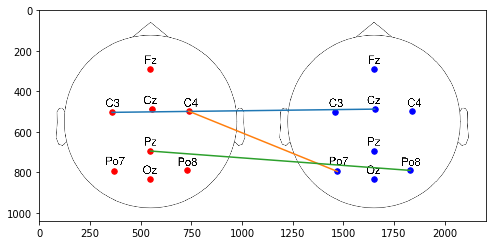

In [85]:
vis_pairs([1, 3, 5], [2, 4, 6])

In [86]:
list(channels)

['Fz', 'C3', 'Cz', 'C4', 'Po7', 'Pz', 'Po8', 'Oz']